In [59]:
import pandas as pd
import numpy as np
import pylab as pl
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [3]:
data = pd.read_csv("../data/ChurnData.csv")

In [4]:
data.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [5]:
data.isna().sum()

tenure      0
age         0
address     0
income      0
ed          0
employ      0
equip       0
callcard    0
wireless    0
longmon     0
tollmon     0
equipmon    0
cardmon     0
wiremon     0
longten     0
tollten     0
cardten     0
voice       0
pager       0
internet    0
callwait    0
confer      0
ebill       0
loglong     0
logtoll     0
lninc       0
custcat     0
churn       0
dtype: int64

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,200.0,35.505000,21.640971,1.000,16.75000,33.500,55.2500,72.000
age,200.0,41.165000,13.076803,19.000,31.00000,40.000,51.0000,76.000
address,200.0,11.650000,10.158419,0.000,3.00000,9.000,18.0000,48.000
income,200.0,75.130000,128.430468,9.000,31.00000,48.000,80.0000,1668.000
ed,200.0,2.825000,1.285550,1.000,2.00000,3.000,4.0000,5.000
employ,200.0,10.225000,8.957430,0.000,3.00000,7.500,17.0000,44.000
equip,200.0,0.425000,0.495584,0.000,0.00000,0.000,1.0000,1.000
callcard,200.0,0.705000,0.457187,0.000,0.00000,1.000,1.0000,1.000
wireless,200.0,0.290000,0.454901,0.000,0.00000,0.000,1.0000,1.000
longmon,200.0,11.789250,9.887250,1.100,5.53750,8.250,14.3000,62.300


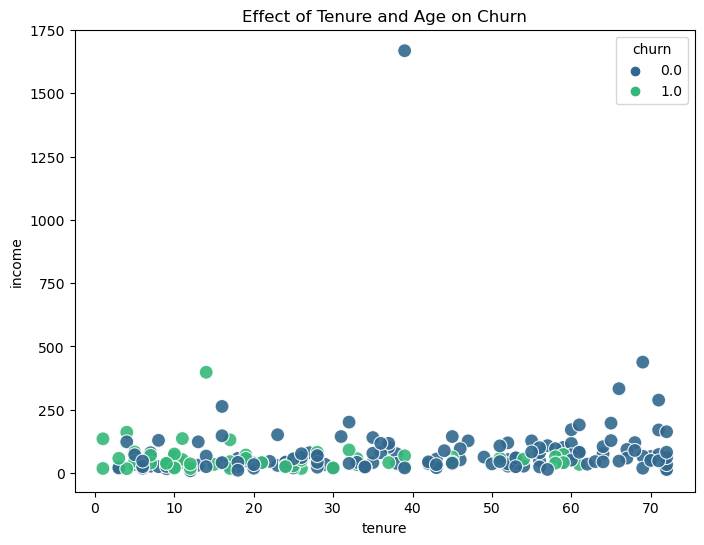

In [36]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='tenure', y='income', hue='churn', s=100, palette='viridis', alpha=0.)
plt.title('Effect of Tenure and Age on Churn')
plt.show()

In [11]:
Q1 = data['income'].quantile(0.25)
Q3 = data['income'].quantile(0.75)
IQR = Q3 - Q1

aykiri_degerler = (data['income'] < Q1 - 1.5 * IQR) | (data['income'] > Q3 + 1.5 * IQR)
aykiri_veri = data[aykiri_degerler]

In [17]:
from scipy import stats

z_scores = stats.zscore(data['income'])
aykiri_degerler = (z_scores > 3) | (z_scores < -3)
aykiri_veri = data[~aykiri_degerler]

In [23]:
aykiri_veri["income"].describe()

count    199.000000
mean      67.125628
std       60.819233
min        9.000000
25%       31.000000
50%       48.000000
75%       80.000000
max      438.000000
Name: income, dtype: float64

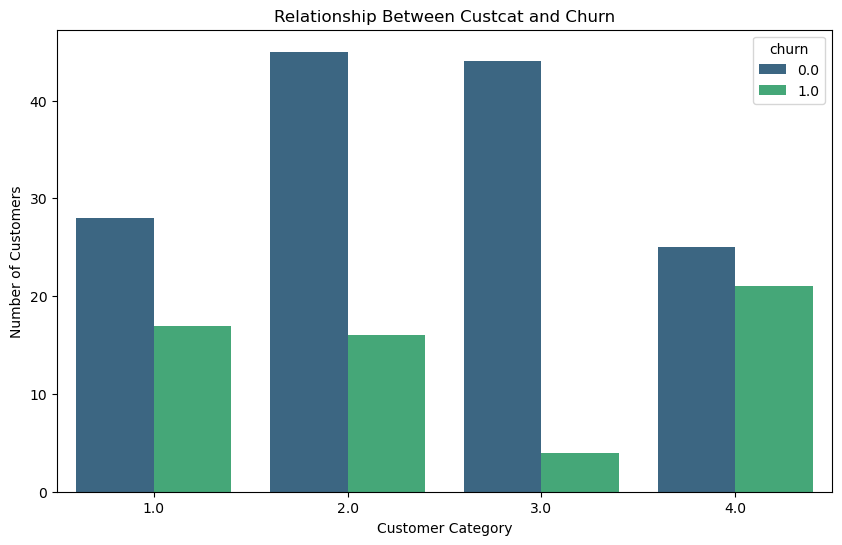

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='custcat', hue='churn', data=data, palette='viridis')
plt.title('Relationship Between Custcat and Churn')
plt.xlabel('Customer Category')
plt.ylabel('Number of Customers')
plt.show()

In [75]:
x= aykiri_veri.drop("churn",axis=1)
y= aykiri_veri["churn"]
# x= data.drop("churn",axis=1)
# y= data["churn"]

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [77]:
log_reg_model = LogisticRegression(C=0.01, solver="liblinear")
log_reg_model.fit(x_train, y_train)

LogisticRegression(C=0.01, solver='liblinear')

In [78]:
y_pred = log_reg_model.predict(x_test)

In [112]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

Confusion Matrix:
[[26  1]
 [ 8  5]]


In [80]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy}')

Model Accuracy: 0.775


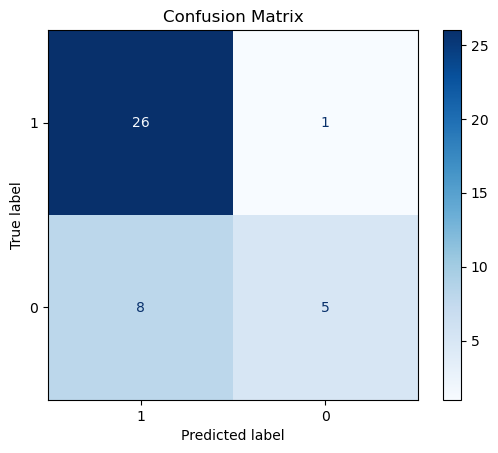

In [113]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[1,0])
disp.plot(cmap="Blues", values_format="d")
plt.title('Confusion Matrix')
plt.show()

In [111]:
# plt.figure(figsize=(8,6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted label')
# plt.ylabel('True label')
# plt.title('Confusion Matrix')
# plt.show()

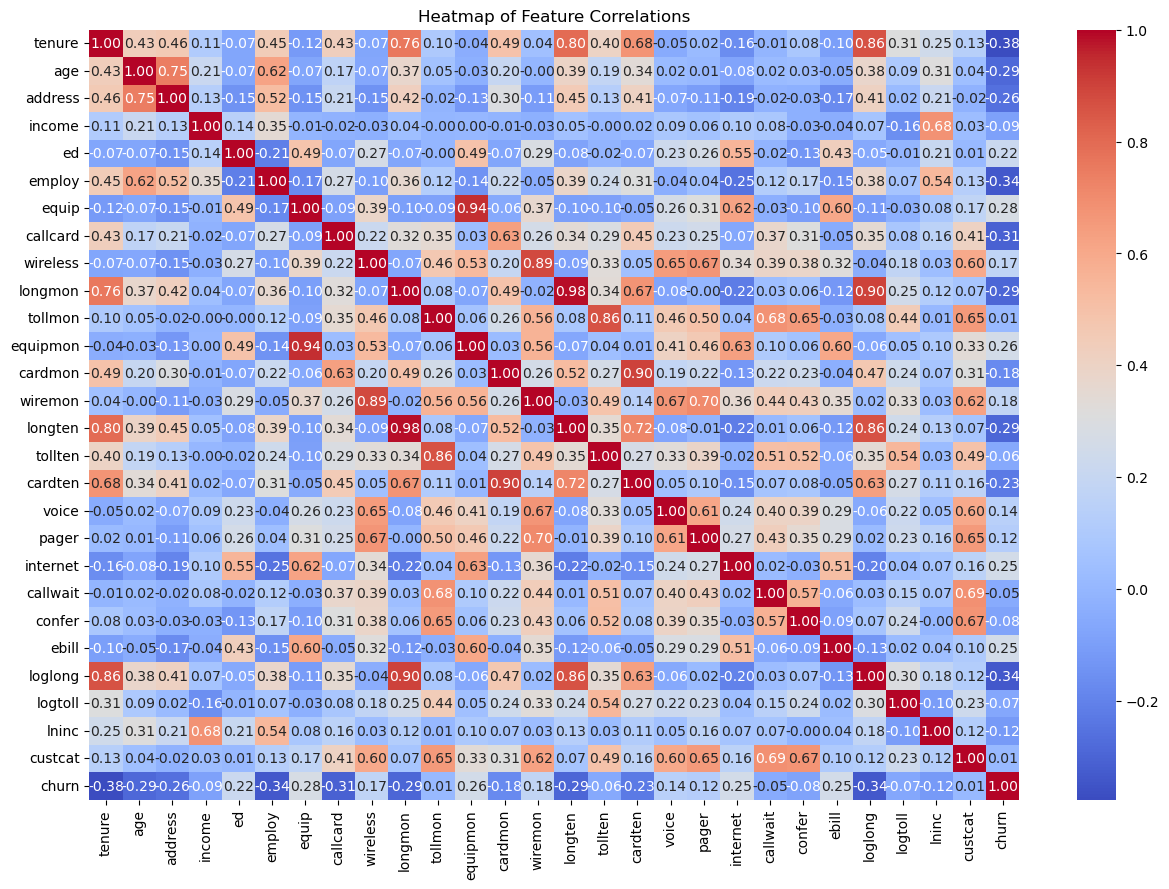

In [63]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Heatmap of Feature Correlations')
plt.show()

In [96]:
log_reg_new_model = LogisticRegression(C=0.01, solver="sag",)
log_reg_new_model.fit(x_train,y_train)

c:\Users\Excalibur\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.01, solver='sag')

### Evaluation

In [82]:
# jaccard index 
from sklearn.metrics import jaccard_score

jaccard_score(y_test,y_pred, pos_label=0)

0.7428571428571429

In [83]:
# F1- score

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.96      0.85        27
         1.0       0.83      0.38      0.53        13

    accuracy                           0.78        40
   macro avg       0.80      0.67      0.69        40
weighted avg       0.79      0.78      0.75        40



In [86]:
# Log loss
proba_result = log_reg_model.predict_proba(x_test)
from sklearn.metrics import log_loss
log_loss(y_test,proba_result)

0.4836307334807917